# **Задача классификации**

In [4]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
%matplotlib inline

# 0. Описание задачи

Обладая некоторой общей информацией о пациенте (для получения этой информации не нужно проводить серьезные медицинские исследования), нужно спрогнозировать риск диабета.

# 1. Загрузка данных

In [5]:
data_raw = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

Количество объектов в датасете:

In [6]:
data_raw.shape[0]

253680

Количество признаков у каждого объекта:

In [7]:
data_raw.shape[1]

22

Первые 15 объектов:

In [8]:
data_raw.head(15)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Мы видим, что столбцы (признаки) имеют имена

- `Diabetes_012` - наличие диабета, 2 - диабет, 1 - преддиабет, 0 - нет диабета
- `HighBP` - высокое кровяное давление, 1 - есть, 0 нет
- `HighChol` - повышенный уровень холестерина, 1 - есть, 0 - нет
- `CholCheck` - проверка уровня холестерина за последние 5 лет, 1 - была, 0 - нет
- `BMI` - индекс массы тела
- `Smoker` - ответ на вопрос: Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь?, 1 - да, 0 - нет
- `Stroke` - инсульт, 1 - был, 0 - нет
- `HeartDiseaseorAttack` - ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ), 1 - есть, 0 - нет
- `PhysActivity` - физическая активность за последние 30 дней, не включая работу, 1 - была, 0 - нет
- `Fruits` - употребление фруктов 1 и более раз за день, 1 - да, 0 - нет
- `Veggies` - употребление овощей 1 и более раз за день, 1 - да, 0 - нет
- `HvyAlcoholConsump` - сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю), 1 - да, 0 - нет
- `AnyHealthcare` - наличие любого вида медицинского обслуживания, включая медицинскую страховку и т.д., 1 - да, 0 -нет
- `NoDocbcCost` - ответ на вопрос: Было ли за последние 12 месяцев время, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за дороговизны?, 1 - да, 0 - нет
- `GenHlth` - здоровье пациента, по его мнению, 1 - отличное, 2 - очень хорошее, 3 - хорошее, 4 - удовлетворительное, 5 - плохое
- `MentHlth` - ответ на вопрос: Сколько дней в течение последних 30 дней ваше психическое здоровье было плохим?(психическое здоровье включает стресс, депрессию и проблемы с эмоциями и т. д.), от 0 до 30 дней
- `PhysHlth` - ответ на вопрос: Сколько дней в течение последних 30 дней ваше физическое здоровье было плохим?(физическое здоровье включает в себя физические заболевания и травмы и т. д.), от 0 до 30 дней
- `DiffWalk` - ответ на вопрос: Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?, 1 - да, 0 - нет
- `Sex` - пол, 1 - мужской, 0 - женский
- `Age` - возраст, 1 - от 18 до 24, 2 - от 25 до 29, 3 - от 30 до 34, 4 - от 35 до 39, 5 - от 40 до 44, 6 - от 45 до 49, 7 - от 50 до 54, 8 - от 55 до 59, 9 - от 60 до 64, 10 - от 65 до 69, 11 - от 70 до 74, 12 - от 75 до 79, 13 - от 80 и старше
- `Education` - образование, 1 - никогда не посещал школу или только детский сад, 2 - 1-8 классы (начальная школа), 3 - 9-11 классы (старшая школа), 4 - 12 класс или GED (выпускник старшей школы), 5 - Колледж от 1 года до 3 лет (некоторые колледжи или техническая школа), 6 - Колледж 4 года или более (выпускник колледжа)
- `Income` - доходы, 1 - менее 10 000 долларов США, 2 - менее 15 000 долларов США (от 10 000 до менее 15 000 долларов США), 3 - менее 20 000 долларов США (от 15 000 до менее 20 000 долларов США), 4 - менее 25 000 долларов США (от 20 000 до менее 25 000 долларов США), 5 менее 35 000 долларов США (от 25 000 до менее 35 000 долларов США), 6 - менее 50 000 долларов США (от 35 000 до менее 50 000 долларов США), 7 - менее 75 000 долларов США (от 50 000 до менее 75 000 долларов США), 8 - 75 000 долларов или больше

Все признаки, за исключением `BMI`, `PhysHlth`, `MentHelt`, категориальные. `BMI`, `PhysHlth`, `MentHelt` - количественные.

In [10]:
data_raw['Diabetes_012'] = data_raw['Diabetes_012'].astype('category')

In [11]:
data_raw['HighBP'] = data_raw['HighBP'].astype('category')

In [12]:
data_raw['HighChol'] = data_raw['HighChol'].astype('category')

In [13]:
data_raw['CholCheck'] = data_raw['CholCheck'].astype('category')

In [14]:
data_raw['Smoker'] = data_raw['Smoker'].astype('category')

In [15]:
data_raw['Stroke'] = data_raw['Stroke'].astype('category')

In [16]:
data_raw['HeartDiseaseorAttack'] = data_raw['HeartDiseaseorAttack'].astype('category')

In [17]:
data_raw['PhysActivity'] = data_raw['PhysActivity'].astype('category')

In [18]:
data_raw['Fruits'] = data_raw['Fruits'].astype('category')

In [19]:
data_raw['Veggies'] = data_raw['Veggies'].astype('category')

In [20]:
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')

In [21]:
data_raw['AnyHealthcare'] = data_raw['AnyHealthcare'].astype('category')

In [22]:
data_raw['NoDocbcCost'] = data_raw['NoDocbcCost'].astype('category')

In [23]:
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')

In [24]:
data_raw['GenHlth'] = data_raw['GenHlth'].astype('category')

In [25]:
data_raw['DiffWalk'] = data_raw['DiffWalk'].astype('category')

In [26]:
data_raw['Sex'] = data_raw['Sex'].astype('category')

In [27]:
data_raw['Age'] = data_raw['Age'].astype('category')

In [28]:
data_raw['Education'] = data_raw['Education'].astype('category')

In [29]:
data_raw['Income'] = data_raw['Income'].astype('category')

In [30]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   HeartDiseaseorAttack  253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

## 2. Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация полученных результатов.

Все диаграммы рассеивания для количественных признаков:

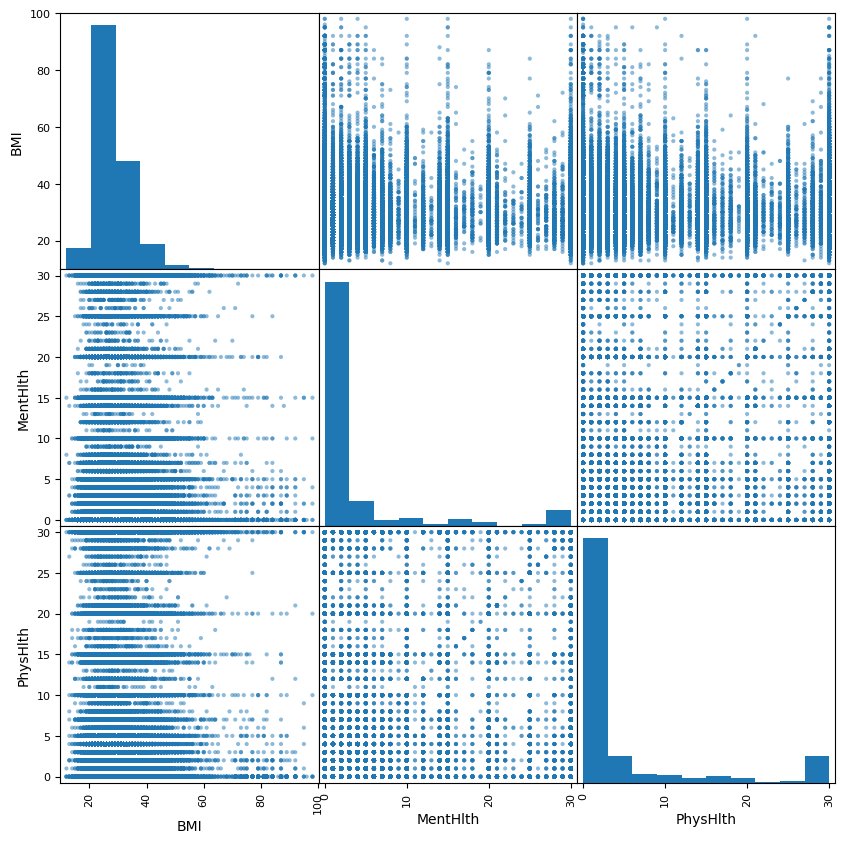

In [31]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 10))
pass

Борьба с выбросами

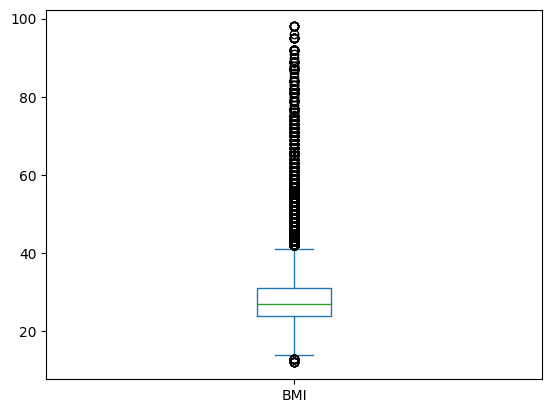

In [32]:
data_raw['BMI'].plot(kind='box')
pass

In [33]:
data_raw['BMI'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    18.0
0.050    20.0
0.100    22.0
0.500    27.0
0.900    36.0
0.950    40.0
0.990    50.0
0.995    55.0
Name: BMI, dtype: float64

Мы видим, что $99\%$ всех значений признака `'BMI'` находится в диапазоне от $17$ до $55$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно). Есть выбросы.

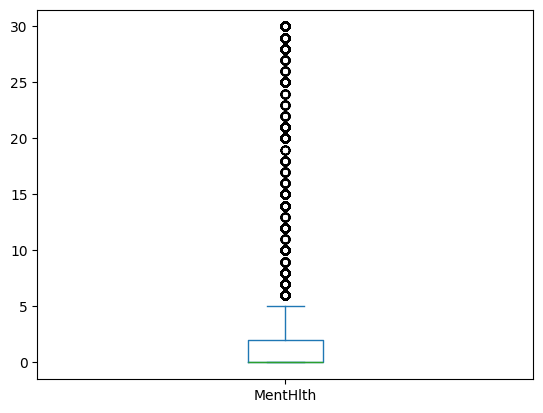

In [34]:
data_raw['MentHlth'].plot(kind='box')
pass

In [35]:
data_raw['MentHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    10.0
0.950    26.0
0.990    30.0
0.995    30.0
Name: MentHlth, dtype: float64

Мы видим, значения квантилей уровней $0.005$ и $0.995$ соответствуют началу и концу диапазона значений признака `'MentHlth'`. Выбросов нет  

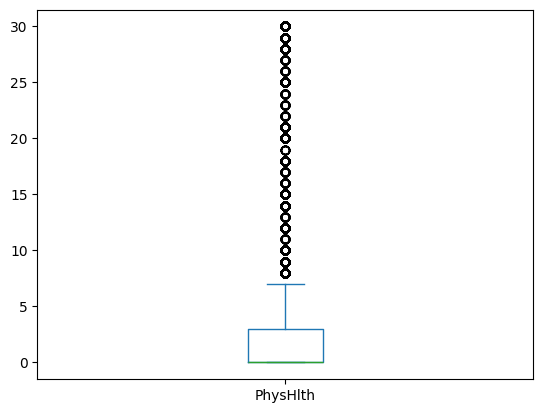

In [36]:
data_raw['PhysHlth'].plot(kind='box')
pass

In [37]:
data_raw['PhysHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    20.0
0.950    30.0
0.990    30.0
0.995    30.0
Name: PhysHlth, dtype: float64

Мы видим, значения квантилей уровней $0.005$ и $0.995$ соответствуют началу и концу диапазона значений признака `'PhysHlth'`. Выбросов нет 

Удалим все строки таблицы, в которых значения `'BMI'` выходят за пределы квантилей $0.005$, $0.995$.

In [38]:
rows_to_drop = data_raw[
    (data_raw['BMI'] < data_raw['BMI'].quantile(0.005)) | (data_raw['BMI'] > data_raw['BMI'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(251944, 22)

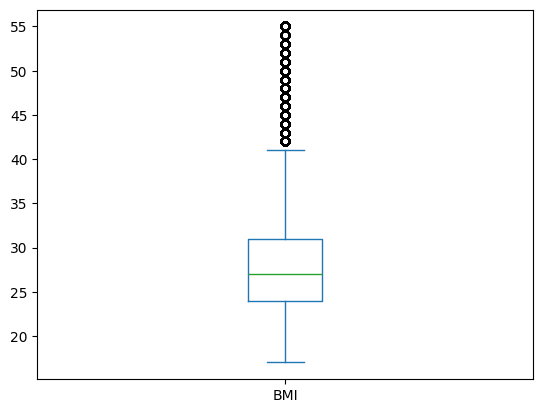

In [39]:
data['BMI'].plot(kind='box')
pass

In [40]:
data.describe()

,BMI,MentHlth,PhysHlth
count,251944.000000,251944.000000,251944.000000
mean,28.213833,3.167775,4.208360
std,5.895330,7.390597,8.681304
min,17.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,55.000000,30.000000,30.000000


In [41]:
data.describe(include=['category'])

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0
unique,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,212361.0,143991.0,145023.0,242535.0,140329.0,241758.0,228249.0,190923.0,159958.0,204532.0,237752.0,239660.0,230820.0,88733.0,209977.0,140855.0,33037.0,106748.0,89986.0


Обновленные диаграммы рассеивания для количественных признаков:

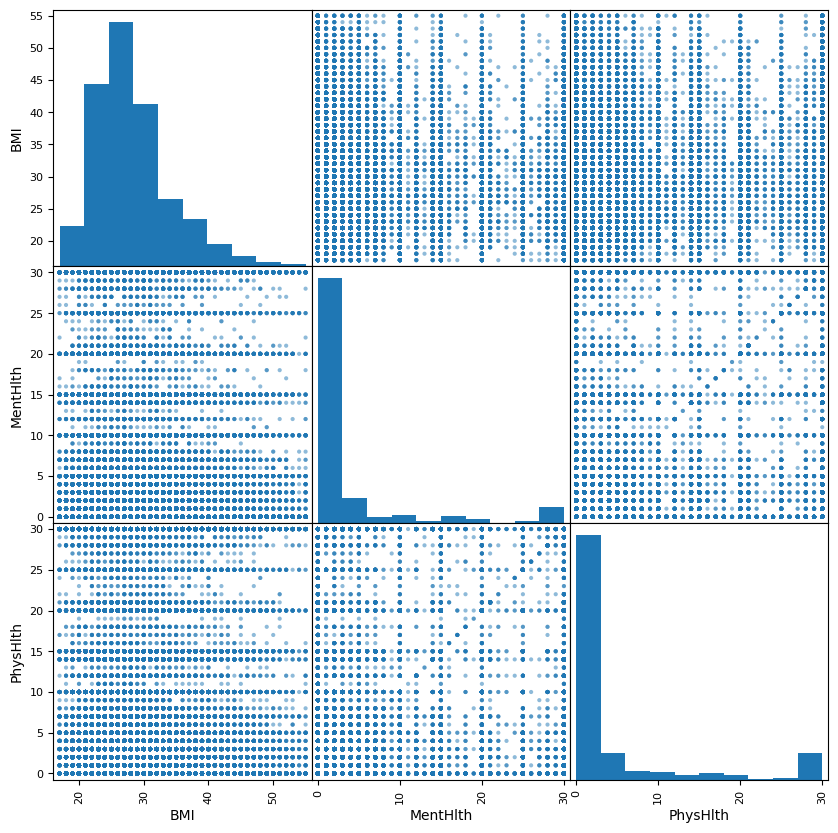

In [42]:
pd.plotting.scatter_matrix(data, figsize = (10, 10))
pass

Из диаграммы рассеивания можно сделать вывод, что у людей с высоким индексом массы тела меньше проблем с психическим и физическим здоровьем. Такие результаты можно объяснить тем, что в выборке достаточно мало людей с большим индексом массы тела, поэтому для них результаты нерепрезентативны. Также на основании диаграммы рассеивания можно сделать вывод о том, что большая часть людей в выборке имеет хорошие ментальное и физическое здоровье. 

Посмотрим, сколько раз некоторые номинальные переменные принимают то или иное значение

In [43]:
data['HeartDiseaseorAttack'].value_counts() 

HeartDiseaseorAttack
0.0    228249
1.0     23695
Name: count, dtype: int64

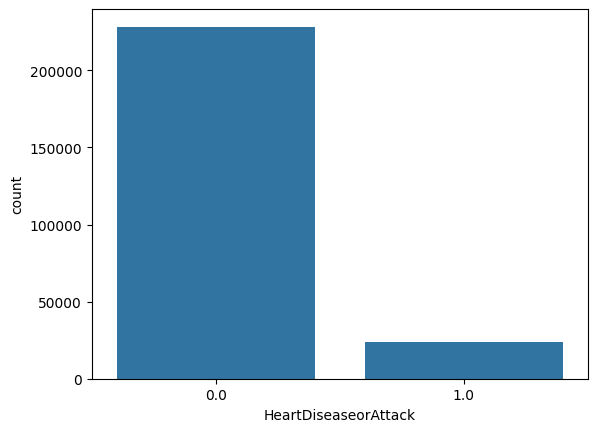

In [44]:
sns.countplot(x='HeartDiseaseorAttack', data=data)
pass

In [45]:
data['HighChol'].value_counts()

HighChol
0.0    145023
1.0    106921
Name: count, dtype: int64

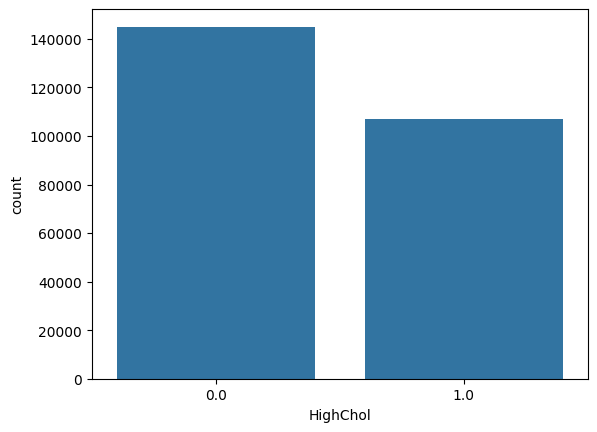

In [46]:
sns.countplot(x='HighChol', data=data)
pass

In [47]:
data['Diabetes_012'].value_counts()

Diabetes_012
0.0    212361
2.0     34987
1.0      4596
Name: count, dtype: int64

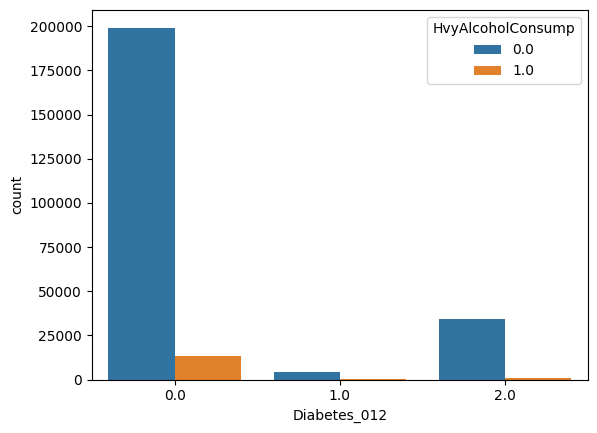

In [48]:
sns.countplot(x='Diabetes_012', hue='HvyAlcoholConsump', data=data)
pass

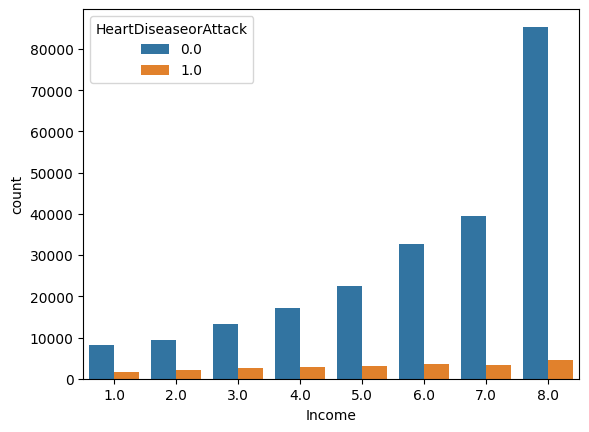

In [49]:
sns.countplot(x='Income', hue='HeartDiseaseorAttack', data=data)
pass

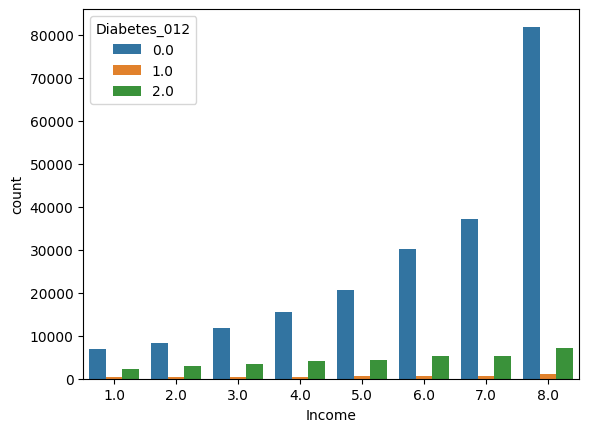

In [50]:
sns.countplot(x='Income', hue='Diabetes_012', data=data)
pass

In [51]:
data['Sex'].value_counts()

Sex
0.0    140855
1.0    111089
Name: count, dtype: int64

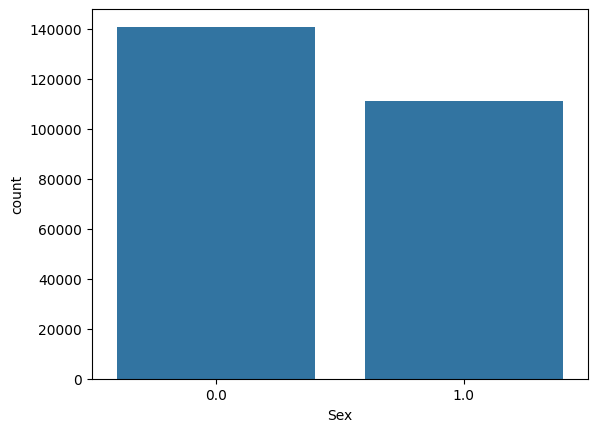

In [52]:
sns.countplot(x='Sex', data=data)
pass

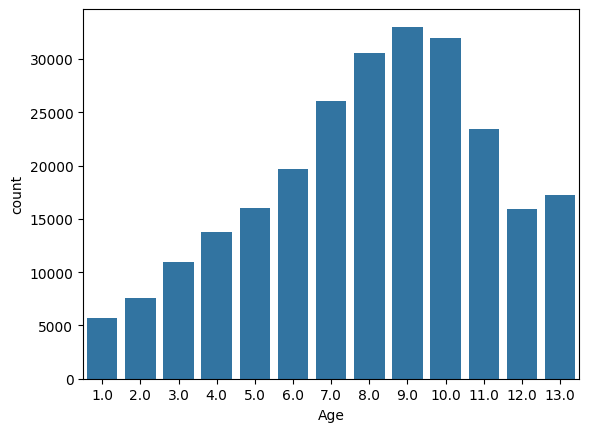

In [53]:
sns.countplot(x='Age', data=data)
pass

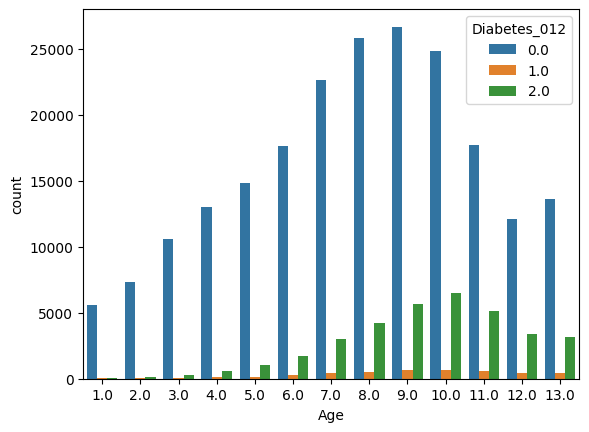

In [54]:
sns.countplot(x='Age', hue='Diabetes_012', data=data)
pass

Риск диабета увеличивается с возрастом.

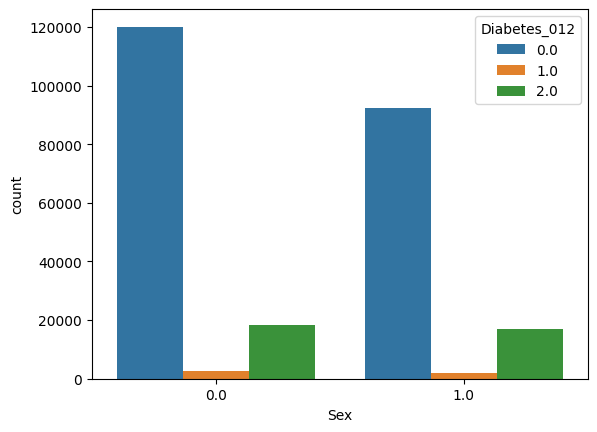

In [55]:
sns.countplot(x='Sex', hue='Diabetes_012', data=data)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

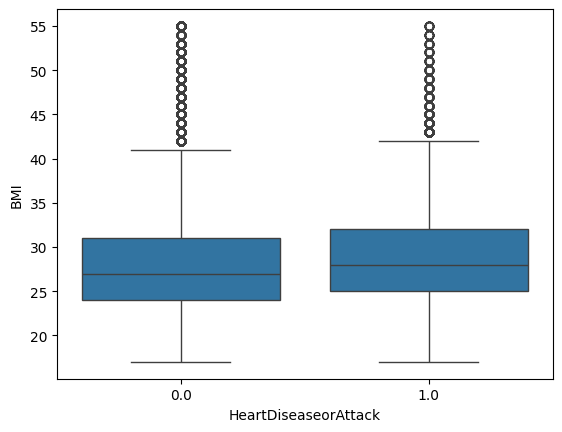

In [56]:
sns.boxplot(x="HeartDiseaseorAttack", y="BMI", data=data)
pass

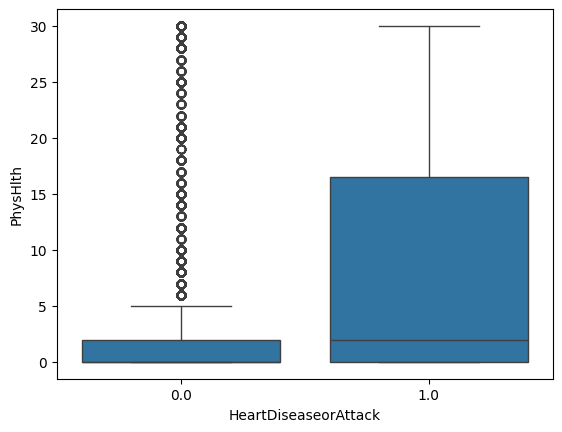

In [57]:
sns.boxplot(x="HeartDiseaseorAttack", y="PhysHlth", data=data)
pass

Люди с болезнями сердца имеют больше проблем с физическим здоровьем(очевидно)

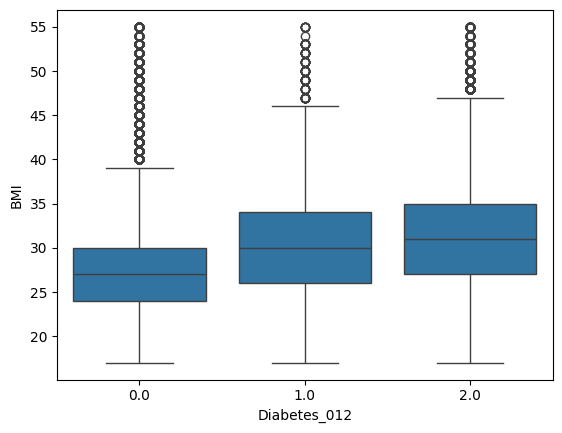

In [58]:
sns.boxplot(x="Diabetes_012", y="BMI", data=data)
pass

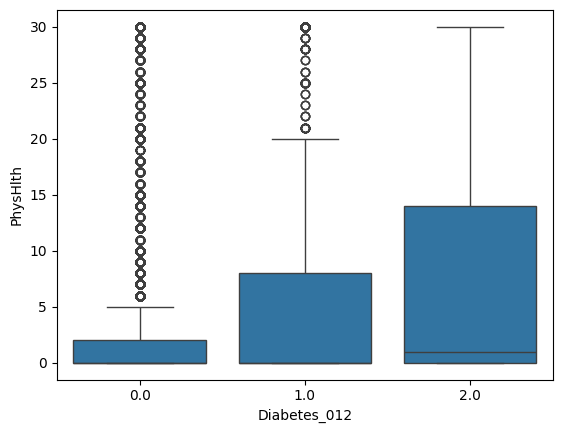

In [59]:
sns.boxplot(x="Diabetes_012", y="PhysHlth", data=data)
pass

Люди с диабетом имеют больше проблем с физическим здровьем и с лишним весом.

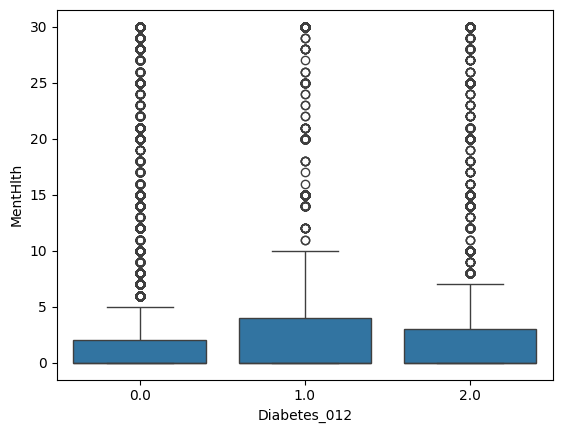

In [60]:
sns.boxplot(x="Diabetes_012", y="MentHlth", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [61]:
corr_mat = data.corr(numeric_only = True)
corr_mat

,BMI,MentHlth,PhysHlth
BMI,1.000000,0.088328,0.125225
MentHlth,0.088328,1.000000,0.352034
PhysHlth,0.125225,0.352034,1.000000


Удобно использовать визуальный образ этой матрицы:

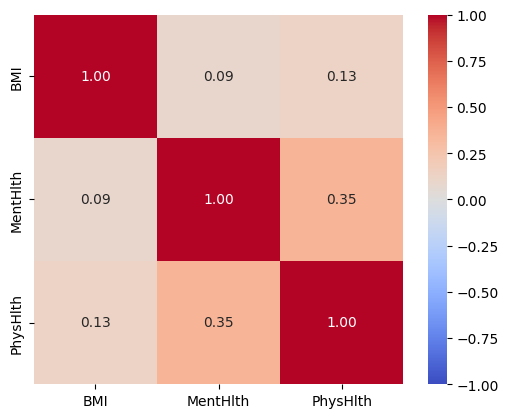

In [62]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [63]:
corr_mat > 0.5

,BMI,MentHlth,PhysHlth
BMI,True,False,False
MentHlth,False,True,False
PhysHlth,False,False,True


In [64]:
np.triu(corr_mat, k=1)

array([[0.        , 0.08832835, 0.12522476],
       [0.        , 0.        , 0.35203376],
       [0.        , 0.        , 0.        ]])

In [65]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Series([], dtype: float64)

In [66]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Series([], dtype: float64)

Вывод: какая-либо серьезная корреляция между количественными признаками отсутствует

## 3. Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [67]:
data.isna().sum()  

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропущенных значений нет, их обработка не требуется

## 4. Обработка категориальных признаков

Обработка бинарных категориальных признаков не требуется, т. к. в датасете эти признаки  уже заданы числовыми значениями 0 и 1. К небинарным категориальным признакам применим метод *бинаризации*:

In [68]:
data_nonbinary = pd.get_dummies(data[['Diabetes_012', 'Age', 'Education', 'Income']])
print(data_nonbinary.columns)

Index(['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0', 'Age_1.0',
       'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0',
       'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
       'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0',
       'Education_5.0', 'Education_6.0', 'Income_1.0', 'Income_2.0',
       'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0'],
      dtype='object')


In [69]:
data = pd.concat((data, data_nonbinary), axis=1).drop(['Diabetes_012', 'Age', 'Education', 'Income'], axis=1)

## 5. Проведение нормализации

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [70]:
data_numerical = data[['BMI', 'MentHlth', 'PhysHlth']]
data_numerical.describe()

,BMI,MentHlth,PhysHlth
count,251944.000000,251944.000000,251944.000000
mean,28.213833,3.167775,4.208360
std,5.895330,7.390597,8.681304
min,17.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,55.000000,30.000000,30.000000


In [71]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [72]:
data_numerical.describe()

,BMI,MentHlth,PhysHlth
count,2.519440e+05,2.519440e+05,2.519440e+05
mean,1.238650e-16,5.866101e-17,-5.189243e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.902155e+00,-4.286224e-01,-4.847612e-01
25%,-7.147748e-01,-4.286224e-01,-4.847612e-01
50%,-2.058974e-01,-4.286224e-01,-4.847612e-01
75%,4.726057e-01,-1.580083e-01,-1.391910e-01
max,4.543625e+00,3.630590e+00,2.970941e+00


In [73]:
data.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)
data = pd.concat((data, data_numerical), axis=1)

## 6. Разбиение данных на обучающую и тестовую выборки

In [74]:
X = data_raw.drop(['Diabetes_012'], axis=1)
y = data_raw['Diabetes_012']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (7.5% - обучающая выборка, 2.5% - тестовая):

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(19026, 6342)

## 7. 8. 9. Запуск классификатора ближайших соседей. Подбор оптимального значения k-а ближайших соседей Вычисление ошибки на обучающей и тестовой выборках. Выводы 

Импорт классификатора k ближайших соседей

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
errors = []
for k in [1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40]:
    # n_neighbors - количество соседей, p - метрика
    model = KNeighborsClassifier(n_neighbors = k, p = 2)
    model.fit(X_train, y_train)
    
    errors.append((k, float(1 - model.score(X_train, y_train)), float(1 - model.score(X_test, y_test))))

In [78]:
# модуль для рисования таблиц
from prettytable import PrettyTable 

In [79]:
table_header = ['Количество соседей, k','Ошибка на тренировочной выборке','Ошибка на тестовой выборке']
table = PrettyTable(table_header)

for x in errors:
    table.add_row(x)

print(table)

+-----------------------+---------------------------------+----------------------------+
| Количество соседей, k | Ошибка на тренировочной выборке | Ошибка на тестовой выборке |
+-----------------------+---------------------------------+----------------------------+
|           1           |      0.0008409544833385407      |    0.21948912015137179     |
|           2           |       0.11284557973299691       |    0.16824345632292648     |
|           3           |        0.1147377273205088       |     0.1780195521917376     |
|           4           |        0.1325028907810365       |    0.16288237149164297     |
|           5           |       0.13224009250499313       |    0.16493219804478088     |
|           7           |        0.1415431514769263       |     0.1598864711447493     |
|           9           |       0.14448649216861142       |    0.16177861873226107     |
|           11          |       0.14632608010091452       |    0.16114790286975722     |
|           13       

In [80]:
errors_opt = min(errors, key=lambda i : i[2])

model = KNeighborsClassifier(n_neighbors = errors_opt[0], p = 2)
model.fit(X_train, y_train)

print('Оптимальное количество соседей, k:', errors_opt[0])
print('Минимальная ошибка на тестовой выборке:', errors_opt[2])


Оптимальное количество соседей, k: 40
Минимальная ошибка на тестовой выборке: 0.15200252286345006


Матрица рассогласования для оптимального k

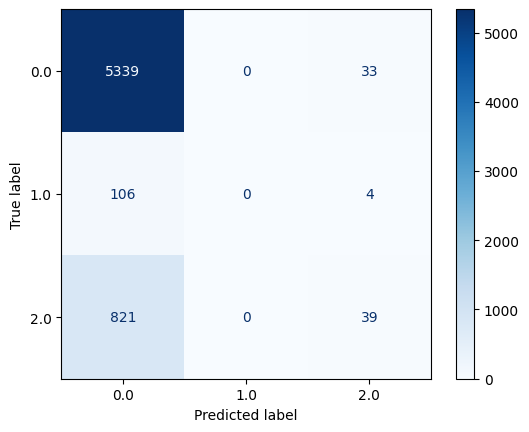

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

Большая часть ошибок, ошибки типа ${\rm FN}$ – false negative (для людей с деабетом и преддиабетом предсказывает отсутствие болезни). Ничтожное число истинно положительных примеров, когда для человека с диабетом или преддиабетом предсказывается его болезнь.

## 10. Запуск других классификаторов

In [82]:
from sklearn import model_selection

cv = model_selection.ShuffleSplit(n_splits = 10, train_size = 0.15, test_size = 0.05, random_state = 0)

In [83]:
from sklearn.model_selection import learning_curve

In [85]:
def draw_learning_curve(model, X = X, y = y, cv = cv, 
                       train_sizes = np.linspace(0.1, 1.0, 10)):

    sizes, scores_train, scores_test = learning_curve(model, X, y, cv = cv, 
                train_sizes = np.linspace(0.1, 1.0, 10))

    err_train = 1 - scores_train
    err_test  = 1 - scores_test

    mean_err_train = np.mean(err_train, axis = 1)
    std_err_train  = np.std (err_train, axis = 1)
    mean_err_test  = np.mean(err_test,  axis = 1)
    std_err_test   = np.std (err_test,  axis = 1)

    plt.figure(figsize = (8, 6))
    plt.fill_between(sizes, mean_err_train - std_err_train, mean_err_train + std_err_train, alpha = 0.15, 
                     color = "r")
    plt.fill_between(sizes, mean_err_test  - std_err_test,  mean_err_test  + std_err_test,  alpha = 0.15, 
                     color = "m")
    plt.plot(sizes, mean_err_train, 'ro-', markeredgecolor = 'r', label = "Train error")
    plt.plot(sizes, mean_err_test,  'mo-', markeredgecolor = 'm', label = "CV error")
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.grid()
    plt.legend(loc = 'best')

### Логистическая регрессия

/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Text(0.5, 1.0, 'Logistic regression')

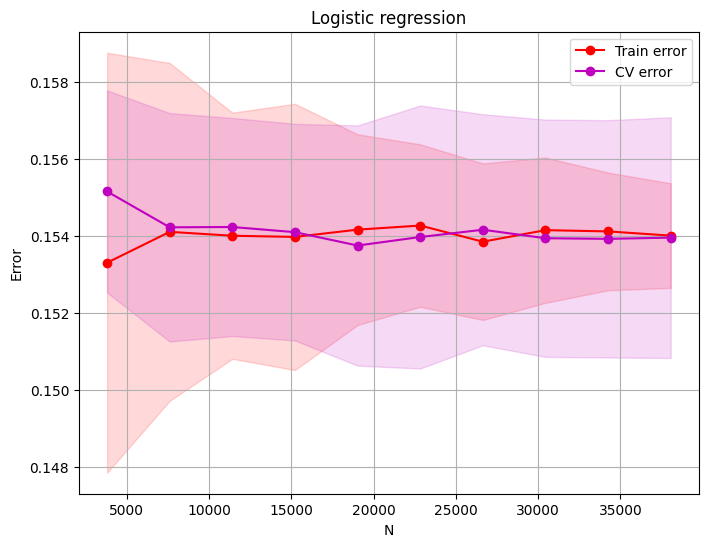

In [90]:
from sklearn.linear_model import LogisticRegression
draw_learning_curve(LogisticRegression(max_iter = 600))
plt.title('Logistic regression')

Небольшой разброс, большое смещение

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(190260, 63420)

/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


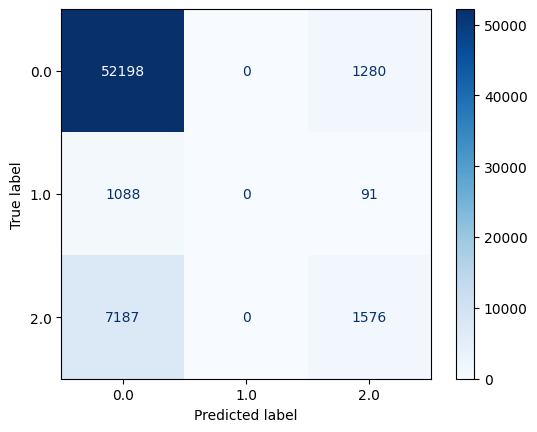

In [92]:
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Random Forest

Text(0.5, 1.0, 'Random Forest Classifier')

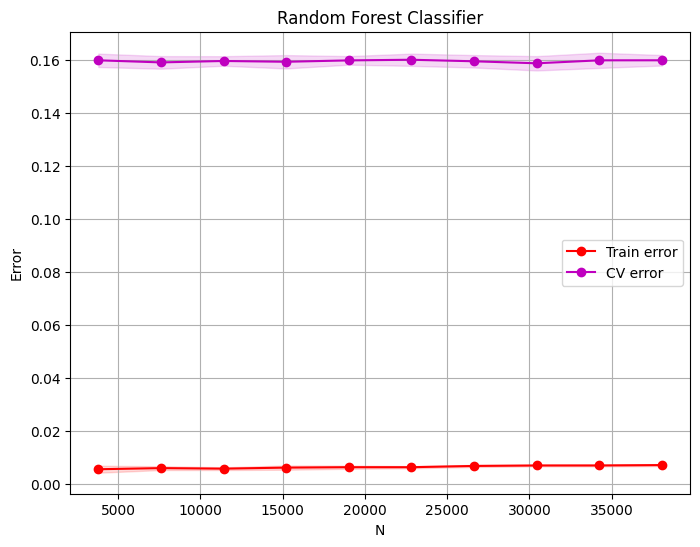

In [93]:
from sklearn.ensemble import RandomForestClassifier
draw_learning_curve(RandomForestClassifier(n_estimators = 20))
plt.title('Random Forest Classifier')

Большой разброс - переобучение

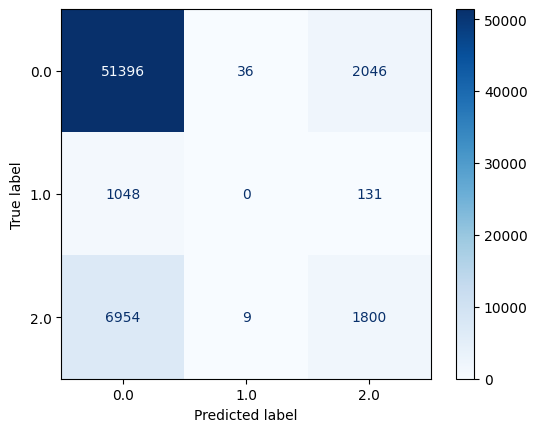

In [94]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Полносвязная нейронная сеть

Text(0.5, 1.0, 'Fully connected neural network')

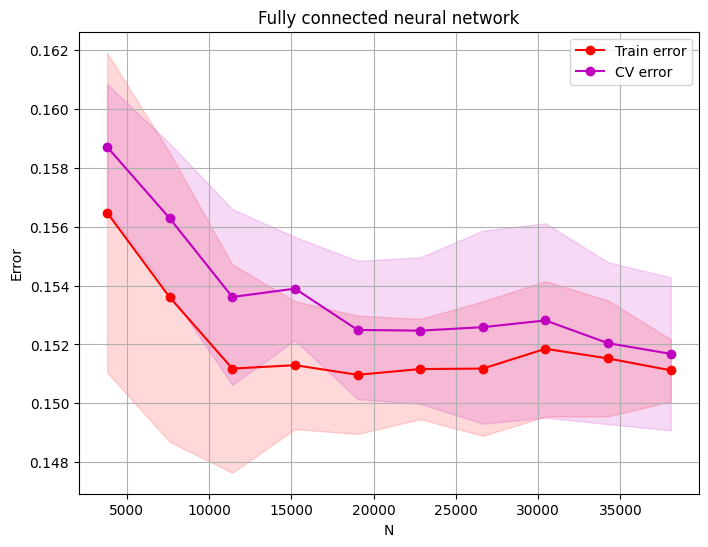

In [95]:
from sklearn.neural_network import MLPClassifier
draw_learning_curve(MLPClassifier(hidden_layer_sizes = (5), max_iter=600, random_state = 42))
plt.title('Fully connected neural network')

Небольшой разброс, большое смещение

Найдем оптимальное значение параметра $\alpha$ и количество нейронов

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.1, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(76104, 25368)

In [97]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-5, 5, 20)
neurons_arr = np.linspace(1, 10, 10)
test_err = []
train_err = []

for neuron in neurons_arr:
    test_err.append([])
    train_err.append([])
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(hidden_layer_sizes = (int(neuron)), max_iter=600, random_state = 42, alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[int(neuron) - 1].append(np.mean(y_train != y_train_pred))
        test_err[int(neuron) - 1].append(np.mean(y_test != y_test_pred))

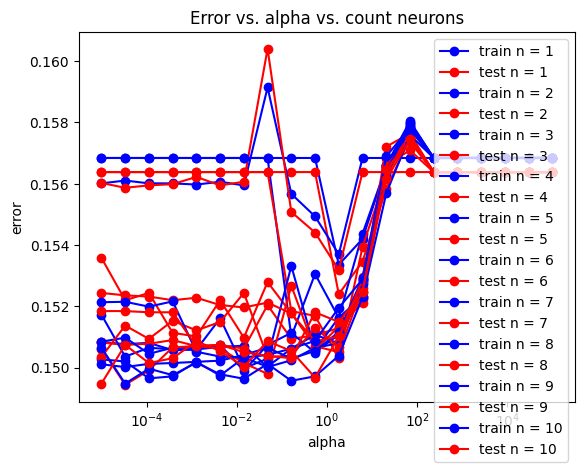

In [98]:
for i in range(0, 10):
    plt.semilogx(alpha_arr, train_err[i], 'b-o', label = 'train n = ' + str(i + 1))
    plt.semilogx(alpha_arr, test_err[i], 'r-o', label = 'test n = ' + str(i + 1))
plt.title('Error vs. alpha vs. count neurons')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Можно заметить, что ни одна вариация парметра $\alpha$ и количества нейронов не уменьшила ошибку должным образом, но найдем оптимальные параметры $\alpha$ и количества нейронов.

In [99]:
min_test_err_arr = []

for i in range(0, 10):
    min_test_err_arr.append(np.min(test_err[i]))

min_test_err = np.min(min_test_err_arr)
res_n = [i for i, j in enumerate(min_test_err_arr) if j == min_test_err]

res_a = [i for i, j in enumerate(test_err[res_n[0]]) if j == min_test_err]
    
print('Count neurons = ', int(neurons_arr[res_n[0]]))
print('Parameter a = ', alpha_arr[res_a[0]])
print('Minimum test error = ', min_test_err)

Count neurons =  6
Parameter a =  3.359818286283781e-05
Minimum test error =  0.14944023967202774


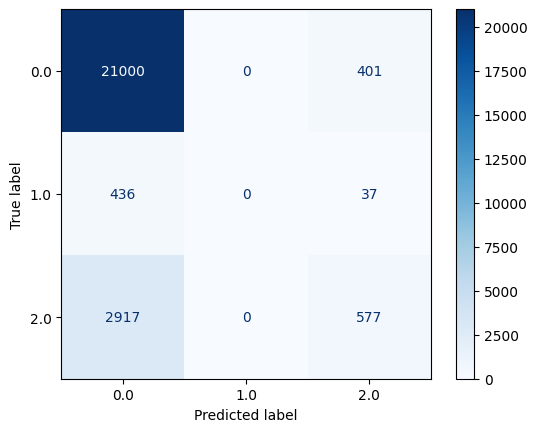

In [100]:
model = MLPClassifier(hidden_layer_sizes = (int(neurons_arr[res_n[0]])), max_iter=600, random_state = 42, alpha = alpha_arr[res_a[0]])
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

Во всех случаях получаем тот же результат, что и при использовании классификатора с k ближайшими соседями: большая часть ошибок, ошибки типа ${\rm FN}$ – false negative (для людей с диабетом и преддиабетом предсказывает отсутствие болезни). Ничтожное число ${\rm TP}$ – true positive, истинно положительных примеров.

## 11. Борьба с несбалансированностью классов 

Уберем часть объектов, чтобы выровнять количество элементов каждого класса

In [102]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_miss, y_miss = nm.fit_resample(X, y.ravel())

In [120]:
print('После применения метода кол-во меток со значением 2: {}'.format(sum(y_miss == 2)))
print('После применения метода кол-во меток со значением 1: {}'.format(sum(y_miss == 1)))
print('После применения метода кол-во меток со значением 0: {}'.format(sum(y_miss == 0)))

После применения метода кол-во меток со значением 2: 4631
После применения метода кол-во меток со значением 1: 4631
После применения метода кол-во меток со значением 0: 4631


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(10419, 3474)

Проведем вычисления, ипользуя оптимальный параметр k, полученный ранее 

In [105]:
model = KNeighborsClassifier(n_neighbors = errors_opt[0], p = 2)
model.fit(X_train, y_train)

print('Количество соседей, k:', errors_opt[0])
print('Ошибка на тренировочной выборке:', 1 - model.score(X_train, y_train))
print('Ошибка на тестовой выборке:', 1 - model.score(X_test, y_test))

Количество соседей, k: 40
Ошибка на тренировочной выборке: 0.28630386793358287
Ошибка на тестовой выборке: 0.3042602187679908


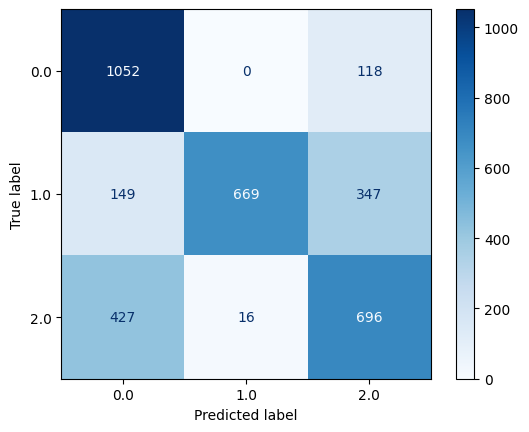

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

Ошибка и на тестовой и на тренировочной выборках выросла, но истинно положительных примеров стало больше чем ложно положительных, значит борьба с несбалансированностью классов дала результат.

Проведем вычисления для других классификаторов

### Логистическая регрессия

/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Text(0.5, 1.0, 'Logistic regression')

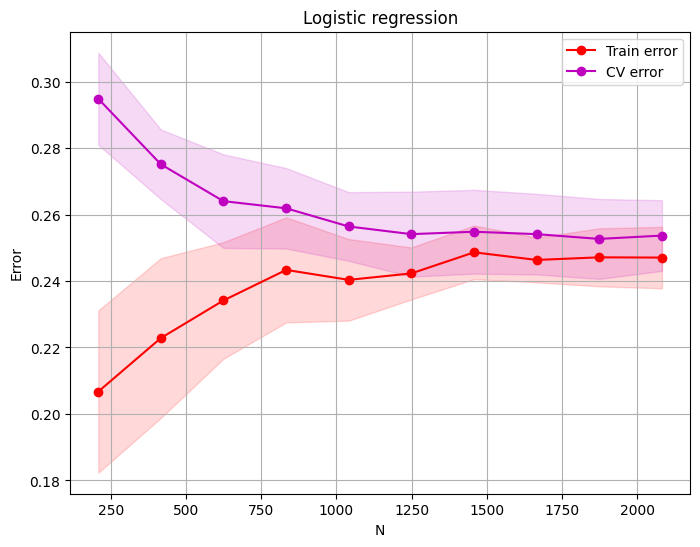

In [107]:
from sklearn.linear_model import LogisticRegression
draw_learning_curve(LogisticRegression(max_iter = 600), X = X_miss, y = y_miss)
plt.title('Logistic regression')

Разброс такой же маленький, но смещение выросло

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(10419, 3474)

/home/evgeny/Рабочий стол/Машинное обучение/ML_2023/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


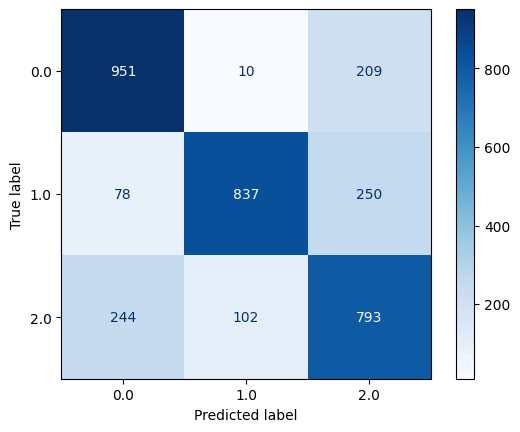

In [109]:
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

На матрице рассогласования достаточно хорошо видно, что после борьбы с несбалансированностью классов логистическая регрессия стала лучше угадывать объекты из всех классов.

### Random Forest

Text(0.5, 1.0, 'Random Forest Classifier')

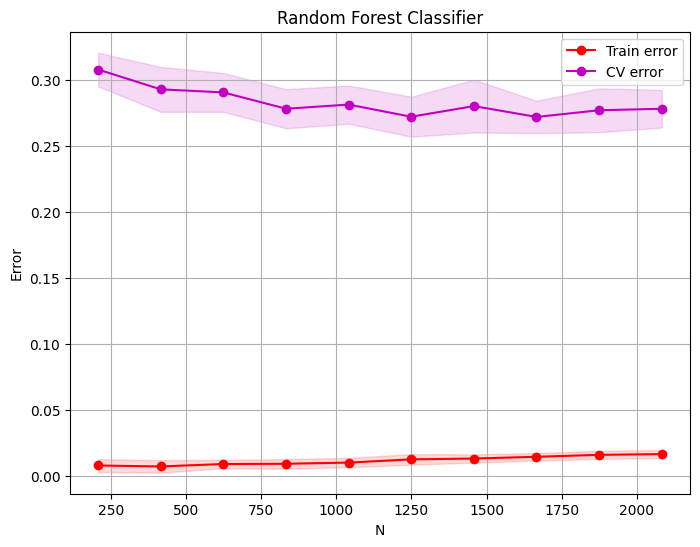

In [110]:
from sklearn.ensemble import RandomForestClassifier
draw_learning_curve(RandomForestClassifier(n_estimators = 20), X = X_miss, y = y_miss)
plt.title('Random Forest Classifier')

После балансировки классов у RandomForest выросла ошибка

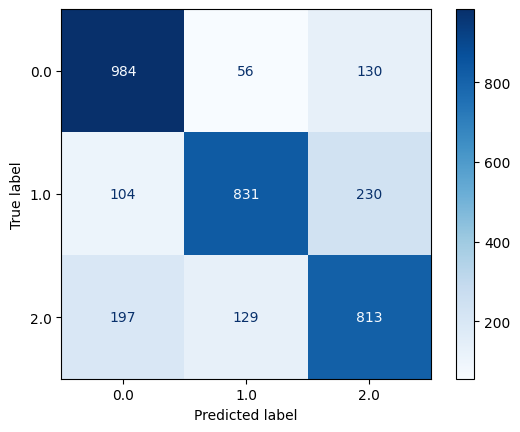

In [111]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

На матрице рассогласования достаточно хорошо видно, что после борьбы с несбалансированностью классов Random Forest стал лучше угадывать объекты из всех классов.

### Полносвязная нейронная сеть

Text(0.5, 1.0, 'Fully connected neural network')

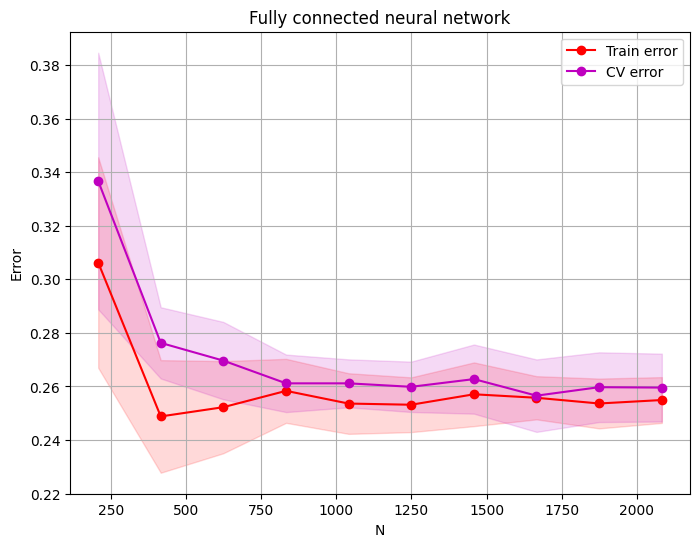

In [112]:
from sklearn.neural_network import MLPClassifier
draw_learning_curve(MLPClassifier(hidden_layer_sizes = (5), max_iter=1500, random_state = 42), X = X_miss, y = y_miss)
plt.title('Fully connected neural network')

Сдвиг увеличился

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(10419, 3474)

In [114]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-5, 5, 20)
neurons_arr = np.linspace(1, 10, 10)
test_err = []
train_err = []

for neuron in neurons_arr:
    test_err.append([])
    train_err.append([])
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(hidden_layer_sizes = (int(neuron)), max_iter=600, random_state = 42, alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[int(neuron) - 1].append(np.mean(y_train != y_train_pred))
        test_err[int(neuron) - 1].append(np.mean(y_test != y_test_pred))

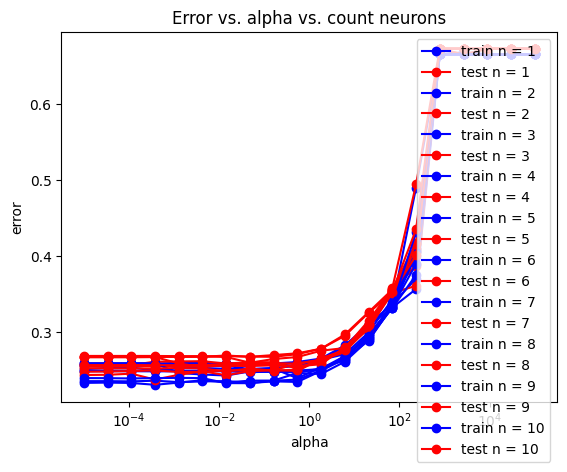

In [115]:
for i in range(0, 10):
    plt.semilogx(alpha_arr, train_err[i], 'b-o', label = 'train n = ' + str(i + 1))
    plt.semilogx(alpha_arr, test_err[i], 'r-o', label = 'test n = ' + str(i + 1))
plt.title('Error vs. alpha vs. count neurons')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [116]:
min_test_err_arr = []

for i in range(0, 10):
    min_test_err_arr.append(np.min(test_err[i]))

min_test_err = np.min(min_test_err_arr)
res_n = [i for i, j in enumerate(min_test_err_arr) if j == min_test_err]

res_a = [i for i, j in enumerate(test_err[res_n[0]]) if j == min_test_err]
    
print('Count neurons = ', int(neurons_arr[res_n[0]]))
print('Parameter a = ', alpha_arr[res_a[0]])
print('Minimum test error = ', min_test_err)

Count neurons =  9
Parameter a =  0.000379269019073225
Minimum test error =  0.2374784110535406


Даже с оптимальными параметрами ошибка достаточно большая

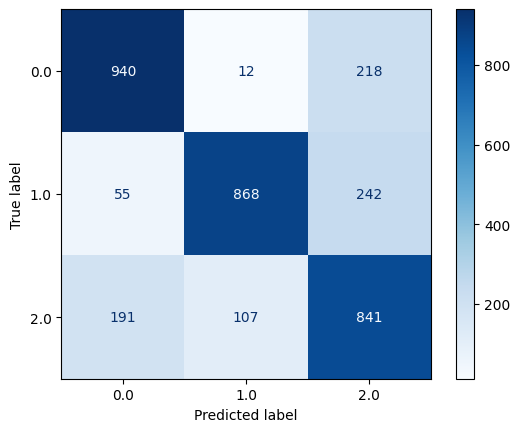

In [117]:
model = MLPClassifier(hidden_layer_sizes = (int(neurons_arr[res_n[0]])), max_iter=600, random_state = 42, alpha = alpha_arr[res_a[0]])
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

## 12. Исключение коррелированных переменных 

Корреляция между количественными переменными отсутствует

## 13. Общие выводы

Для выполнении задания был использован датасет Diabetes Health Indicators Dataset. \
Задача: прогноз риска диабета и преддиабета.

В ходе работы были выполнены следующие задачи:
- Описана задача
- Прочитаны данные
- Визуализированы данные и вычислены основные характеристики
- Обработаны категориальные признаки
- Проведена нормализация
- Данные разбиты на обучающую и тестовую выборки
- Запущен классификатор ближайших соседей для разных количеств
- Вычислена ошибка на обучающей и тестовой выборках - сделаны выводы

В датасете нет пропущенных значений, поэтому их не ненужно было обрабатывать. \
Так же в датасете есть несбалансированные классы (84.2/1.8/14 - люди без диабета/люди c преддиабетом/люди с диабетом). Была проведена балансировка классов. \
Количество выбросов: ~0.7%

Для решения задачи использовался классификатор ближайших соседей, причем были проведены вычисления при разном значениии параметра k - соседей. Получили, что оптимальное число соседей: 40. Ошибка на тестовой выборке при этом параметре: 0.15200252286345006, причем большая часть ошибок вида ${\rm FN}$ – false negative (для людей с диабетом и преддиабетом предсказывает отсутствие болезни) и почти полное отсутствие истинно положительных примеров ${\rm TP}$. После балансировки классов количество истинно положительных примеров выросло, но и ошибка тоже стала больше.

Данный метод классификации объектов не подходит для решения задачи, т.к ошибка классификации объектов достаточно большая.

Дополнительно были запущены другие классификаторы: логистическая регрессия, random forest, нейронные сети. На них получились похожие результаты. Можно предположить, что текущий набор данных плохо подходит для решения поставленой задачи.